<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#DB.NOMICS-and-Python/Pandas-Interface" data-toc-modified-id="DB.NOMICS-and-Python/Pandas-Interface-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DB.NOMICS and Python/Pandas Interface</a></span></li><li><span><a href="#How-to-find-and-fetch-the-data-we-want?" data-toc-modified-id="How-to-find-and-fetch-the-data-we-want?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>How to find and fetch the data we want?</a></span><ul class="toc-item"><li><span><a href="#Fetching-data-from-Cart-by-API-Link" data-toc-modified-id="Fetching-data-from-Cart-by-API-Link-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fetching data from Cart by API Link</a></span></li><li><span><a href="#Fetching-data-individually" data-toc-modified-id="Fetching-data-individually-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fetching data individually</a></span></li><li><span><a href="#Reshaping-dataframe" data-toc-modified-id="Reshaping-dataframe-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Reshaping dataframe</a></span></li></ul></li><li><span><a href="#Visualize-data" data-toc-modified-id="Visualize-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize data</a></span></li></ul></div>

by [MachinaFantasma](https://phantomachine.github.io/) | [Twitter](https://twitter.com/MachinaFantasma)

# Purpose

In this notebook, we do the following:

1. Introduce you to the ``Pandas`` library for data management and visualization.

2. Exploit a convenient database provider called ``DB.NOMICS`` and their Python Application Programming Interface (API) for easily fetching publicly available data.

3. Show how to do some basic operations with ``Pandas``, including plotting simple time series data (with ``Matplotlib``).

# DB.NOMICS and Python/Pandas Interface

We'll use data provided through a third-party database aggregation service called [DB.Nomics](https://db.nomics.world/). They also provide a convenient ``Python`` library called ``dbnomics``.

Ensure that you [have this library installed](https://pypi.org/project/DBnomics/). 

In [1]:
import dbnomics as db
from dbnomics import fetch_series, fetch_series_by_api_link

We'll use the ``Pandas`` library to manipulate and analyze the data we import into dataframes.

We will also need a plotting library for visualize graphs and charts. Here I choose to use ``matplotlib``.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# How to find and fetch the data we want?



1. Search on the "Providers" page of [DB.Nomics](https://db.nomics.world/providers).
    * We see there are many agencies that participate in this database.
    * In this example, we are interested in data from the International Monetary Fund (IMF).

2. Use keyword search to discover the data series we want.

3. Note/copy the data series' ``dbnomics`` *application programming interface* (API) *link name*.
    * For example, the real GDP series in constant international dollars for Korea (KOR) has an *API link name* of ``IMF/WEO/KOR.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar``
    
4. Once we know which data series we want to download, we will use the `fetch_series` function to download this, or to download multiple series at once.
    * If there are many series you're interested in getting in one go, then add these to the "Cart" in [DB.Nomics](https://db.nomics.world/providers) and navigate to their "Cart" page. At the top right, you can download all these API link names all at once using the "Download" -> "Copy API Link - JSON" button/drop-down menu command.

## Fetching data from Cart by API Link

In this example below, we use the ``fetch_series_by_api_link`` function to download many series from the "Cart". 
* This is provided by ``dbnomics``. 
* See previous comments. 

This automatically organizes the data into a ``Pandas`` dataframe, or ``df`` in short:

In [3]:
# Fetch data using API link from DB.NOMICS "Cart"
df_raw = fetch_series_by_api_link(
    "https://api.db.nomics.world/v22/series?observations=1&series_ids=IMF/WEO/KOR.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/SGP.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/PHL.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/MYS.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/USA.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/AUS.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/DEU.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/JPN.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/TWN.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar,IMF/WEO/CHN.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar"
    )

Let's display the first rows of this `DataFrame` by using the `head` method, each row representing an observation of the time series:

In [4]:
df_raw.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,weo-country,weo-subject,unit,WEO Country,WEO Subject,Unit
0,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1980,1980-01-01,5200.031,5200.031,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
1,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1981,1981-01-01,5487.139,5487.139,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
2,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1982,1982-01-01,5849.547,5849.547,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
3,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1983,1983-01-01,6527.211,6527.211,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
4,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1984,1984-01-01,7120.422,7120.422,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...


## Fetching data individually

Alternatively, if you're patient and want to see what you import, then you can use ``fetch_series`` to fetch the same data as the last method.

In [5]:
df_raw2 = fetch_series([
                    'IMF/WEO/KOR.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar', 
                    'IMF/WEO/SGP.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/PHL.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/MYS.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/USA.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/AUS.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/DEU.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/JPN.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/TWN.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                    'IMF/WEO/CHN.NGDPRPPPPC.purchasing_power_parity_2011_international_dollar',
                   ])

In [6]:
df_raw2.head()

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,weo-country,weo-subject,unit,WEO Country,WEO Subject,Unit
0,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1980,1980-01-01,5200.031,5200.031,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
1,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1981,1981-01-01,5487.139,5487.139,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
2,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1982,1982-01-01,5849.547,5849.547,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
3,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1983,1983-01-01,6527.211,6527.211,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...
4,annual,IMF,WEO,WEO by countries,KOR.NGDPRPPPPC.purchasing_power_parity_2011_in...,"Korea – Gross domestic product per capita, con...",1984,1984-01-01,7120.422,7120.422,KOR,NGDPRPPPPC,purchasing_power_parity_2011_international_dollar,Korea,"Gross domestic product per capita, constant pr...",Purchasing power parity; 2011 international do...


## Reshaping dataframe

The default dataframe ``df_raw`` (or ``df_raw2``) was organized by default.

* Data is often stored in so-called “stacked” or “record” format.

We want to reshape the dataframe into an orientation that is easier to read. Let's just focus on ``df`` from earlier.

* Read more here on what you can do in terms of [reshaping dataframes](https://pandas.pydata.org/docs/user_guide/reshaping.html).

In [7]:
df = df_raw.pivot(
                    index="original_period", 
                    columns="weo-country", 
                    values="original_value"
                  )

**Warning**:
    
* In this simple example, we are only dealing with the one data type: Real GDP per person.

* So I directly relabelled the column titles by ``weo-country`` names.

* If you are dealing with more dimensions to your dataframe then you'll need to be more careful! [See more here](https://pandas.pydata.org/docs/user_guide/).

Let see this reshaped dataframe:

In [8]:
df

weo-country,AUS,CHN,DEU,JPN,KOR,MYS,PHL,SGP,TWN,USA
original_period,,,,,,,,,,
1980,24402.740,718.568,26198.777,20769.324,5200.031,7792.239,4389.861,20932.437,8062.540,29135.978
1981,25008.726,744.898,26178.349,21486.502,5487.139,8132.231,4428.330,22107.684,8479.933,29577.300
1982,24615.690,799.303,25990.568,22043.038,5849.547,8400.872,4476.556,22661.098,8732.327,28767.383
1983,24191.201,873.987,26487.013,22662.793,6527.211,8709.122,4448.346,24282.294,9382.795,29813.851
1984,25408.361,993.818,27345.986,23529.343,7120.422,9156.515,4022.880,25922.569,10174.725,31692.731
1985,26418.451,1112.074,28014.622,24606.934,7597.069,8792.696,3638.909,25725.990,10528.760,32722.011
1986,26665.732,1192.394,28672.099,25290.420,8366.135,8656.637,3673.865,26096.054,11623.696,33548.731
1987,27533.975,1310.055,29088.147,26359.833,9316.923,8891.310,3738.799,28482.292,12956.791,34400.814
1988,28201.940,1434.134,29992.106,28029.506,10324.483,9538.321,3902.871,30896.373,13834.839,35513.421


# Visualize data

In [9]:
# There is a current bug in MATPLOTLIB when used with Pandas
# I'll disable the related annoying warning for now
# See Open Issue: https://github.com/pandas-dev/pandas/issues/35684
import warnings
warnings.filterwarnings('ignore')

Let's visualize all the data we have in ``df``:

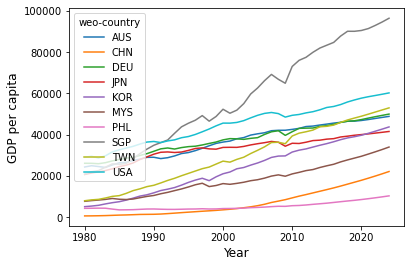

In [10]:
ax = df.plot(kind='line')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

You can also cherry pick which one you want to plot:

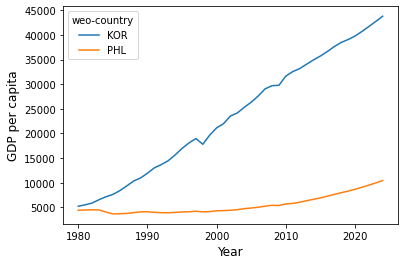

In [11]:
# Korea vs Phillipines ...
ax = df[['KOR','PHL']].plot(kind='line')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

**Pause and think** ...

What can we say about the trajectories of GDP per capita, when we compare

* Korea and the Phillipines?

Hint: Observe that in the initial observations, they are quite "close". What happened over time? What do you think might have *caused* their different paths over time?

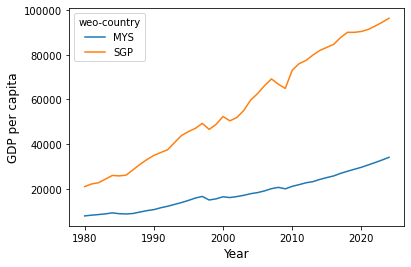

In [12]:
# Malaysia vs Singapore ...
ax = df[['MYS','SGP']].plot(kind='line')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

**Pause and think** ...

What can we say about the trajectories of GDP per capita, when we compare

* Malaysia and Singapore?

Hint: Observe that in the initial observations, they are quite "close". What happened over time? What do you think might have *caused* their different paths over time?